# A Rate-Based Model of Neural Activity-Dependent Homeostatic Plasticity

###Goals/Objectives/Questions:

[***Correlation structure***] It is hypothesized that the relative numbers of ion channels embedded in the membrane of neurons maintained by activity-dependent homeostatic plasticity (ADHP) is related to the proportion in which they are inserted in response to hypo- or hyper-activity (ADHP mechanism details). However, these correlation structures could more readily be explained by the degeneracy of neural parameter space -- the fact that multiple ion channel configurations can produce the same average activity levels. Therefore, we aim to show that the same correlation structures can be produced regardless of ADHP mechanism details. This would support the explanation that it is instead a consequence of parameter space degeneracy.

###Main Inpsiration Paper(s):
Caplan, J. S., Williams, A. H., & Marder, E. (2014). Many parameter sets in a multicompartment model oscillator are robust to temperature perturbations. The Journal of Neuroscience: The Official Journal of the Society for Neuroscience, 34(14), 4963–4975. https://doi.org/10.1523/JNEUROSCI.0280-14.2014

O’Leary, T., Williams, A. H., Caplan, J. S., & Marder, E. (2013). Correlations in ion channel expression emerge from homeostatic tuning rules. Proceedings of the National Academy of Sciences, 110(28). https://doi.org/10.1073/pnas.1309966110

Santin, J. M., & Schulz, D. J. (2019). Membrane Voltage Is a Direct Feedback Signal That Influences Correlated Ion Channel Expression in Neurons. Current Biology, 29(10), 1683-1688.e2. Scopus. https://doi.org/10.1016/j.cub.2019.04.008

Schulz, D. J., Goaillard, J.-M., & Marder, E. (2006). Variable channel expression in identified single and electrically coupled neurons in different animals. Nature Neuroscience, 9(3), Article 3. https://doi.org/10.1038/nn1639

Temporal, S., Desai, M., Khorkova, O., Varghese, G., Dai, A., Schulz, D. J., & Golowasch, J. (2012). Neuromodulation independently determines correlated channel expression and conductance levels in motor neurons of the stomatogastric ganglion. Journal of Neurophysiology, 107(2), 718–727. https://doi.org/10.1152/jn.00622.2011

Temporal, S., Lett, K. M., & Schulz, D. J. (2014). Activity-dependent feedback regulates correlated ion channel mRNA levels in single identified motor neurons. Current Biology: CB, 24(16), 1899–1904. https://doi.org/10.1016/j.cub.2014.06.067

In [ ]:
#extraneous output is suppressed with -q
!pip install -q tellurium

     |████████████████████████████████| 121 kB 4.1 MB/s 
     |████████████████████████████████| 36.7 MB 1.6 MB/s 
     |████████████████████████████████| 3.3 MB 33.7 MB/s 
     |████████████████████████████████| 133 kB 43.5 MB/s 
     |████████████████████████████████| 2.6 MB 40.9 MB/s 
     |████████████████████████████████| 3.2 MB 11.6 MB/s 
     |████████████████████████████████| 121 kB 18.1 MB/s 
     |████████████████████████████████| 121 kB 43.8 MB/s 
     |████████████████████████████████| 121 kB 50.2 MB/s 
     |████████████████████████████████| 4.3 MB 41.0 MB/s 
     |████████████████████████████████| 5.6 MB 30.7 MB/s 
     |████████████████████████████████| 6.8 MB 24.0 MB/s 
     |████████████████████████████████| 54.8 MB 233 kB/s 
     |████████████████████████████████| 2.1 MB 47.1 MB/s 
     |████████████████████████████████| 1.6 MB 58.3 MB/s 


In [ ]:
import tellurium as te
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import plotly as px
import plotly.graph_objects as go

**Step 1**: Recreate individual timeseries from Figure 1

In [ ]:
model = '''
R1: -> Vm ; (g1*(E1-Vm) + g2*(E2-Vm) + g3*(E3-Vm)) / Cm
R2: -> Ca ; (A*(e^(b*Vm)) - Ca) / TauCa
R3: -> g1 ; g1*(Ca - Ct) / Tau1
R4: -> g2 ; g2*(Ca - Ct) / Tau2
R5: -> g3 ; g3*(Ca - Ct) / Tau3

e = 2.7182818284                            #Euler's number

g1 = 100; g2 = 20; g3 = 10;            # conductances uS/nF
E1 = -90; E2 = -30; E3 = 50;           # corresponding reversal potentials
A = 109.2                              # uM (from experimental fitting)
b = .08                                # mV^-1 (from experiment fitting)
Ca = 0.2;                              # calcium concentration
Vm = -50;                              # membrane potential
Ct = 1;                                # (uM) target 
Cm = 1;                                # Membrane capacitance
Tau1 = 4000;
Tau2 = -6000;
Tau3 = -1000;
TauCa = 100;                           #ms
'''

r = te.loada(model)

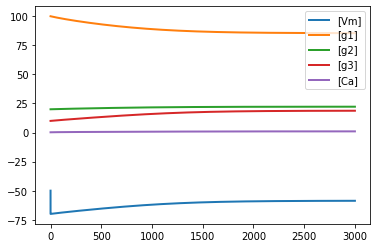

end [Ca]: 0.9947389735705077


In [ ]:
r.reset()
result = r.simulate(0,3000,30000)
r.plot()
print('end [Ca]:',result[-1,-1])

Generic Python Model to double-check

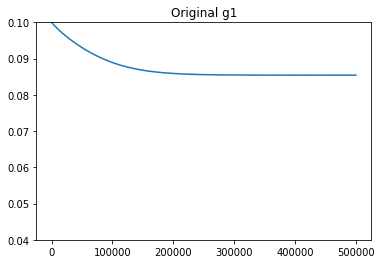

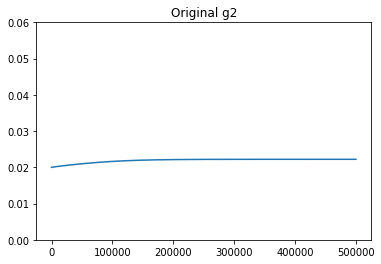

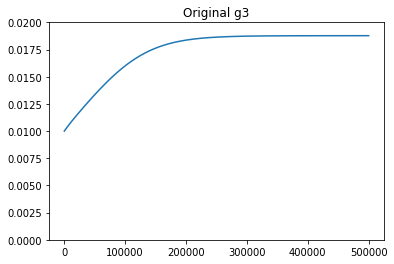

final [Ca] 0.9999484494697508
final Vm -58.66525822735212


In [ ]:
#original tau's (blue in figure)

t = 0
dt = .01
totalSimSteps = 500000
dataoriginal = np.zeros((5,totalSimSteps))             #Tau1 = 4000, Tau2 = -6000, Tau3 = -1000      
#initial values
Vm = -70
Ca = .2
g1 = 100
g2 = 20
g3 = 10

#parameter values 
Ct = 1                                # (uM) target 
Cm = 1                                # Membrane capacitance
Tau1 = 4000
Tau2 = -6000
Tau3 = -1000
TauCa = 100  
A = 109.2                              # uM (from experimental fitting)
b = .08 

for i in range(totalSimSteps):
  Vm += dt*((g1*(-90-Vm) + g2*(-30-Vm) + g3*(50-Vm)) / Cm)
  Ca += dt*((A*(np.exp(b*Vm)) - Ca) / TauCa)
  g1 += dt*(g1*(Ca - Ct) / Tau1)
  g2 += dt*(g2*(Ca - Ct) / Tau2)
  g3 += dt*(g3*(Ca - Ct) / Tau3)
  dataoriginal[:,i] = np.array([Ca,Vm,g1,g2,g3])
  t += dt

dataoriginal = np.vstack((np.arange(0,totalSimSteps), dataoriginal))
#print(dataoriginal)
#plt.plot(dataoriginal[0,:],dataoriginal[1,:],label = "Ca")
#plt.plot(dataoriginal[0,:],dataoriginal[2,:],label='Vm')
plt.plot(dataoriginal[0,:],dataoriginal[3,:]/1000,color='tab:blue')
plt.ylim([.04,.1])
plt.title('Original g1')
plt.show()
plt.plot(dataoriginal[0,:],dataoriginal[4,:]/1000,label='g2',color='tab:blue')
plt.ylim([0,.06])
plt.title('Original g2')
plt.show()
plt.plot(dataoriginal[0,:],dataoriginal[5,:]/1000,label='g3',color='tab:blue')
plt.ylim([0,.02])
plt.title('Original g3')
plt.show()

print('final [Ca]',dataoriginal[1,-1])
print('final Vm', dataoriginal[2,-1])

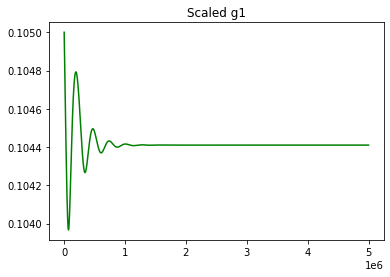

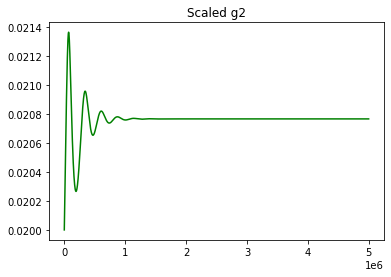

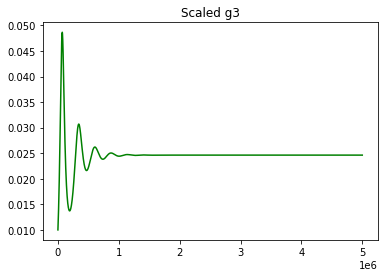

final [Ca] 1.0000000000021998
final Vm -58.6647632917011


In [ ]:
#Scaled tau's (green in figure)

t = 0
dt = .001
totalSimSteps = 5000000     
datascaled = np.zeros((5,totalSimSteps))                 #Tau1 = 4000, Tau2 = -6000/10, Tau3 = -1000/40   
#initial values
Vm = -50
Ca = .2
g1 = 105
g2 = 20
g3 = 10

#parameter values 
Ct = 1                                # (uM) target 
Cm = 1                                # Membrane capacitance
Tau1 = 4000
Tau2 = -6000/10
Tau3 = -1000/40
TauCa = 100  
A = 109.2                              # uM (from experimental fitting)
b = .08 

for i in range(totalSimSteps):
  Vm += dt*((g1*(-90-Vm) + g2*(-30-Vm) + g3*(50-Vm)) / Cm)
  Ca += dt*((A*(np.exp(b*Vm)) - Ca) / TauCa)
  g1 += dt*(g1*(Ca - Ct) / Tau1)
  g2 += dt*(g2*(Ca - Ct) / Tau2)
  g3 += dt*(g3*(Ca - Ct) / Tau3)
  datascaled[:,i] = np.array([Ca,Vm,g1,g2,g3])
  t += dt

datascaled = np.vstack((np.arange(0,totalSimSteps), datascaled))
#print(datascaled)
#plt.plot(datascaled[0,:],datascaled[1,:],label = "Ca")
#plt.plot(datascaled[0,:],datascaled[2,:],label='Vm')
plt.plot(datascaled[0,:],datascaled[3,:]/1000,label='g1',color='green')
plt.title('Scaled g1')
plt.show()
plt.plot(datascaled[0,:],datascaled[4,:]/1000,label='g2',color='green')
plt.title('Scaled g2')
plt.show()
plt.plot(datascaled[0,:],datascaled[5,:]/1000,label='g3',color='green')
plt.title('Scaled g3')
plt.show()

print('final [Ca]',datascaled[1,-1])
print('final Vm', datascaled[2,-1])

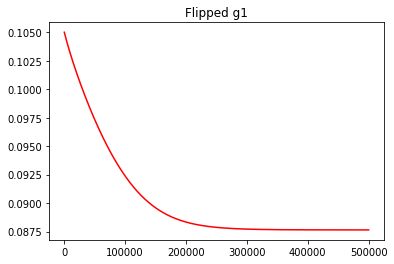

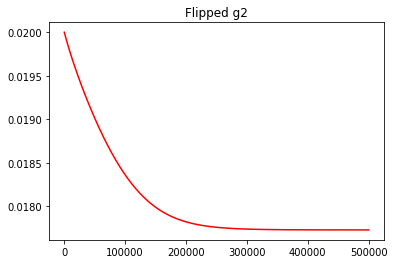

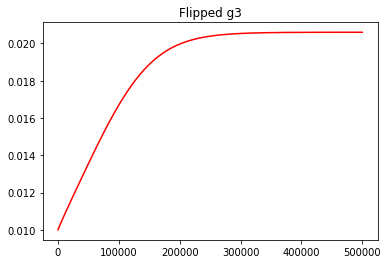

final [Ca] 0.9999316807053102
final Vm -58.66541573205877


In [ ]:
#Flipped tau's (red in figure)

t = 0
dt = .01
totalSimSteps = 500000  
dataflipped = np.zeros((5,totalSimSteps))               #Tau1 = 4000, Tau2 = +6000, Tau3 = -1000   
#initial values
Vm = -70
Ca = .2
g1 = 105
g2 = 20
g3 = 10

#parameter values 
Ct = 1                                # (uM) target 
Cm = 1                                # Membrane capacitance
Tau1 = 4000
Tau2 = 6000  #FLIPPED SIGN
Tau3 = -1000
TauCa = 100  
A = 109.2                              # uM (from experimental fitting)
b = .08 

for i in range(totalSimSteps):
  Vm += dt*((g1*(-90-Vm) + g2*(-30-Vm) + g3*(50-Vm)) / Cm)
  Ca += dt*((A*(np.exp(b*Vm)) - Ca) / TauCa)
  g1 += dt*(g1*(Ca - Ct) / Tau1)
  g2 += dt*(g2*(Ca - Ct) / Tau2)
  g3 += dt*(g3*(Ca - Ct) / Tau3)
  dataflipped[:,i] = np.array([Ca,Vm,g1,g2,g3])
  t += dt

dataflipped = np.vstack((np.arange(0,totalSimSteps), dataflipped))
#print(dataflipped)
#plt.plot(dataflipped[0,:],dataflipped[1,:],label = "Ca")
#plt.plot(dataflipped[0,:],dataflipped[2,:],label='Vm')
plt.plot(dataflipped[0,:],dataflipped[3,:]/1000,label='g1',color = 'red')
plt.title('Flipped g1')
plt.show()
plt.plot(dataflipped[0,:],dataflipped[4,:]/1000,label='g2',color = 'red')
plt.title('Flipped g2')
plt.show()
plt.plot(dataflipped[0,:],dataflipped[5,:]/1000,label='g3',color = 'red')
plt.title('Flipped g3')
plt.show()

print('final [Ca]',dataflipped[1,-1])
print('final Vm', dataflipped[2,-1])

**Step 2**: Test from a small cluster of initial conditions (replicate paper)

In [ ]:
class ADHPModel:
  numRandomStartPoints = 0
  dataOriginal = np.zeros(1)
  startingPoints = np.zeros(1)
  endingPoints = np.zeros(1)
  trajectory = np.zeros(1)
  def __init__(self, initialValues = [-70, 0.2, 105, 20, 10], parameterValues = [1,1,4000,-6000,-1000,100,109.2,0.08]):
    self.initialValues = initialValues
    self.t = 0
    # concentrations
    self.Vm = initialValues[0]
    self.Ca = initialValues[1]
    self.centerg1 = initialValues[2]
    self.centerg2 = initialValues[3]
    self.centerg3 = initialValues[4]
    # parameters
    self.Ct = parameterValues[0]                                # (uM) target 
    self.Cm = parameterValues[1]                                # Membrane capacitance
    self.Tau1 = parameterValues[2]
    self.Tau2 = parameterValues[3]
    self.Tau3 = parameterValues[4]
    self.TauCa = parameterValues[5]  
    self.A = parameterValues[6]                              # uM (from experimental fitting)
    self.b = parameterValues[7] 
  
  def simulate(self, dt, totalSimSteps, numRandomStartPoints = 1, startingVariance = 2.5, plotTrajectory = 0, trajectoryStep = 100):
    self.numRandomStartPoints = numRandomStartPoints
    self.dataOriginal = np.zeros((5,totalSimSteps))
    self.startingPoints = np.zeros((3,numRandomStartPoints))
    self.endingPoints = np.zeros((3,numRandomStartPoints))
    self.trajectory = np.zeros((3,numRandomStartPoints, int(totalSimSteps/trajectoryStep))) # setup trajectory plot. only need to measure every trajectoryStep iterations
    # for each point
    for i in range(numRandomStartPoints):
      self.Vm = -70
      self.Ca = .2
      g1 = np.random.normal(self.centerg1 , startingVariance) # choose our random variange range here
      g2 = np.random.normal(self.centerg2 , startingVariance)
      g3 = np.random.normal(self.centerg3 , startingVariance)
      self.startingPoints[:,i] = np.array([g1,g2,g3])
      #if plotTrajectory == 1 : self.trajectory[:,i,0] = np.array([g1,g2,g3])

      # for each simulation step
      for j in range(totalSimSteps):
        self.Vm += dt*((g1*(-90-self.Vm) + g2*(-30-self.Vm) + g3*(50-self.Vm)) / self.Cm)
        self.Ca += dt*((self.A*(np.exp(self.b*self.Vm)) - self.Ca) / self.TauCa)
        g1 += dt*(g1*(self.Ca - self.Ct) / self.Tau1)
        g2 += dt*(g2*(self.Ca - self.Ct) / self.Tau2)
        g3 += dt*(g3*(self.Ca - self.Ct) / self.Tau3)
        self.dataOriginal[:,j] = np.array([self.Ca,self.Vm,g1,g2,g3])
        self.t += dt
        if (plotTrajectory == 1) and (j % trajectoryStep == 0): self.trajectory[:,i,int(j/trajectoryStep)] = np.array([g1,g2,g3])
      self.endingPoints[:,i] = np.array([g1,g2,g3])
    self.dataOriginal = np.vstack((np.arange(0,totalSimSteps), self.dataOriginal))

# -----------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
num_pts = 10

originalModel = ADHPModel()
originalModel.simulate(0.01, 300000, num_pts, 2.5, 1, 100)

flippedModel = ADHPModel([-70, 0.2, 105, 20, 10], [1,1,4000,6000,-1000,100,109.2,0.08])
flippedModel.simulate(0.01, 300000, num_pts, 2.5, 1, 100)

scaledModel = ADHPModel([-70, 0.2, 105, 20, 10], [1,1,4000,-6000/10,-1000/40,100,109.2,0.08])
scaledModel.simulate(0.01, 300000, num_pts, 2.5, 1, 100)

In [ ]:
#Plot start/end points and trajectories
startpts = np.concatenate((originalModel.startingPoints,flippedModel.startingPoints,scaledModel.startingPoints),axis=1)
endpts = np.concatenate((originalModel.endingPoints,flippedModel.endingPoints,scaledModel.endingPoints),axis=1)
pts = np.concatenate((startpts,endpts),axis=1)
colors = np.concatenate((np.ones(3*num_pts)*0,np.ones(num_pts)*1,np.ones(num_pts)*2,np.ones(num_pts)*3))
#fig = px.line()
    
fig= go.Figure(data=[go.Scatter3d(x=pts[0], y=pts[1], z=pts[2],mode='markers',marker=dict(
    size=8,
    color=colors,                # set color to an array/list of desired values
    colorscale='rainbow',   # choose a colorscale
    opacity=0.8)
  )
])
fig.show()

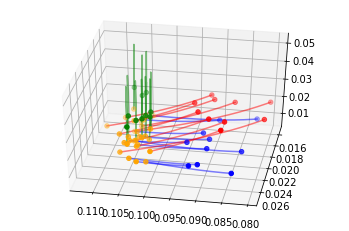

In [ ]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.view_init(elev=40, azim=100)

models = [originalModel,flippedModel,scaledModel]
colors = ['blue','red','green']

for i in range(len(models)):
  Model = models[i]
  color = colors[i]
  for p in range(originalModel.numRandomStartPoints):
    ax.plot3D(Model.trajectory[0,p,:]/1000, Model.trajectory[1,p,:]/1000, Model.trajectory[2,p,:]/1000, color=color, alpha=0.5)
  ax.scatter3D(Model.startingPoints[0,:]/1000,Model.startingPoints[1,:]/1000,Model.startingPoints[2,:]/1000,color='orange')
  ax.scatter3D(Model.endingPoints[0,:]/1000,Model.endingPoints[1,:]/1000,Model.endingPoints[2,:]/1000,color=color)



**Step 3**: Test from a wide variety of initial conditions (Extend paper)

In [ ]:
num_pts = 50

originalModel = ADHPModel([-70, 0.2, 90,20,20])
originalModel.simulate(0.01, 300000, num_pts, 10, 1, 100)

flippedModel = ADHPModel([-70, 0.2, 90,20,20], [1,1,4000,6000,-1000,100,109.2,0.08])
flippedModel.simulate(0.01, 300000, num_pts, 10, 1, 100)

scaledModel = ADHPModel([-70, 0.2, 90,20,20], [1,1,4000,-6000/10,-1000/40,100,109.2,0.08])
scaledModel.simulate(0.01, 300000, num_pts, 10, 1, 100)

In [ ]:
#Plot start/end points and trajectories
startpts = np.concatenate((originalModel.startingPoints,flippedModel.startingPoints,scaledModel.startingPoints),axis=1)
endpts = np.concatenate((originalModel.endingPoints,flippedModel.endingPoints,scaledModel.endingPoints),axis=1)
pts = np.concatenate((startpts,endpts),axis=1)
# colors = np.concatenate((np.ones(3*num_pts)*0,np.ones(num_pts)*1,np.ones(num_pts)*2,np.ones(num_pts)*3))
colors = np.concatenate((np.ones(num_pts)*0,np.ones(num_pts)*1,np.ones(num_pts)*2))
    
fig= go.Figure(data=[go.Scatter3d(x=startpts[0], y=startpts[1], z=startpts[2],mode='markers',marker=dict(
    size=8,
    color=np.ones(3*num_pts),                # set color to an array/list of desired values
    colorscale='rainbow',   # choose a colorscale
    opacity=0.8)
  )
])
fig.show()

fig= go.Figure(data=[go.Scatter3d(x=endpts[0], y=endpts[1], z=endpts[2],mode='markers',marker=dict(
    size=8,
    color=colors,                # set color to an array/list of desired values
    colorscale='rainbow',   # choose a colorscale
    opacity=0.8)
  )
])
fig.show()

**Step 4**: Analyze and contrast correlation structure in both cases

Replicate paper's method of analyzing this (bottom of figure 1). Ideally, replicate their results when using thier small subset of initial points, but show that it breaks down with more initial points


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
def pairwisecorr(model,plotting=False):
  if plotting:
    if model == originalModel:
      color='blue'
    if model == scaledModel:
      color='green'
    if model == flippedModel:
      color='red'
    else:
      color='black'
  corrmatrix = np.ones((3,3))
  coefficients = np.zeros((3,3))
  for i in range(3):
    for j in range(3):
      if i != j:
        a = model.endingPoints[i]
        A=np.reshape(a,(-1,1))
        b=model.endingPoints[j]
        reg = LinearRegression().fit(A,b)
        corrmatrix[i,j] = reg.score(A,b)
        coefficients[i,j] = reg.coef_
        if plotting:
          plt.scatter(a,b,color=color)
          plt.plot(a,reg.predict(A),color=color)
          plt.xlabel('g%s'%(i+1))
          plt.ylabel('g%s'%(j+1))
          plt.show()
          print('R^2=',reg.score(A,b))
          print("Coefficients:", reg.coef_)
  return corrmatrix, coefficients


In [ ]:
num_pts = 50

originalModelsmallinit = ADHPModel()
originalModelsmallinit.simulate(0.01, 300000, num_pts, 2.5, 1, 100)

flippedModelsmallinit = ADHPModel([-70, 0.2, 105, 20, 10], [1,1,4000,6000,-1000,100,109.2,0.08])
flippedModelsmallinit.simulate(0.01, 300000, num_pts, 2.5, 1, 100)

scaledModelsmallinit = ADHPModel([-70, 0.2, 105, 20, 10], [1,1,4000,-6000/10,-1000/40,100,109.2,0.08])
scaledModelsmallinit.simulate(0.01, 300000, num_pts, 2.5, 1, 100)

In [ ]:
#many points, concentrated initial conditions in same area as paper
print(pairwisecorr(originalModelsmallinit)[1])
print(pairwisecorr(flippedModelsmallinit)[1])
print(pairwisecorr(scaledModelsmallinit)[1])

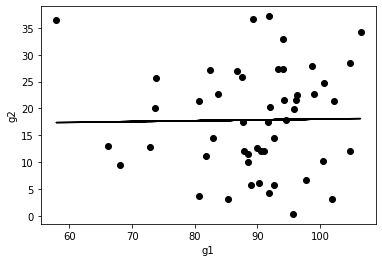

R^2= 0.0002523070546869288
Coefficients: [0.01523775]


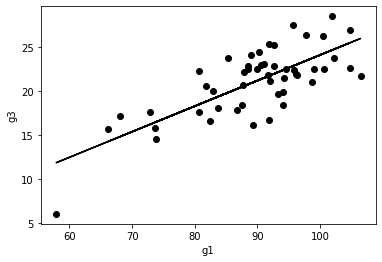

R^2= 0.5623900183208649
Coefficients: [0.29155341]


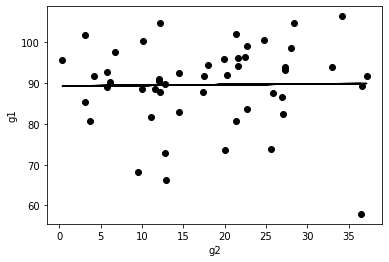

R^2= 0.00025230705468703984
Coefficients: [0.01655802]


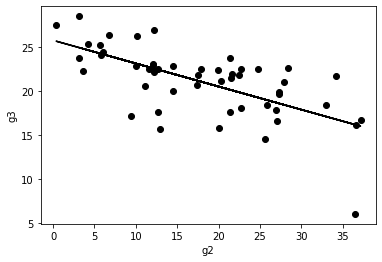

R^2= 0.4209233993775088
Coefficients: [-0.26293271]


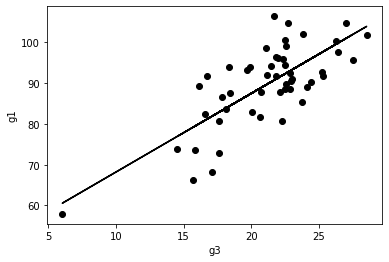

R^2= 0.5623900183208652
Coefficients: [1.92894336]


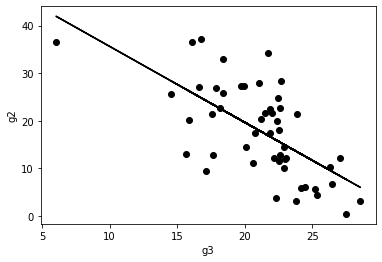

R^2= 0.4209233993775088
Coefficients: [-1.60087881]


(array([[1.00000000e+00, 2.52307055e-04, 5.62390018e-01],
        [2.52307055e-04, 1.00000000e+00, 4.20923399e-01],
        [5.62390018e-01, 4.20923399e-01, 1.00000000e+00]]),
 array([[ 0.        ,  0.01523775,  0.29155341],
        [ 0.01655802,  0.        , -0.26293271],
        [ 1.92894336, -1.60087881,  0.        ]]))

In [ ]:
#many points, spread out initial conditions
pairwisecorr(originalModel,plotting=True)


In [ ]:
print(pairwisecorr(originalModel)[1])
print(pairwisecorr(flippedModel)[1])
print(pairwisecorr(scaledModel)[1])

[[ 0.          0.01523775  0.29155341]
 [ 0.01655802  0.         -0.26293271]
 [ 1.92894336 -1.60087881  0.        ]]
[[ 0.          0.43318578  0.28086363]
 [ 0.59612191  0.         -0.06855687]
 [ 1.4658977  -0.26001489  0.        ]]
[[ 0.         -0.14754936  0.32728817]
 [-0.21315959  0.         -0.32525899]
 [ 2.12842767 -1.46416612  0.        ]]


*Future questions to ask:*
*   Time-series level:

> * Oscillations in green???
*   Are there initial conditions (especially in the flipped/anti-homeostatic case) where a steady state is not reached (or all conductances go to zero)? I expect this to be the case when more initial conditions are considered

*   Parameter space level:

> * Noise in the system-> stable results? (Glazier's suggestion)
*What are the trajectories through parameter space? (Glazier's suggestion)
*Map basin of attraction of $Ca^{2+}$ steady state
*Fitness landscape (where actually is the desired Ca concentration found?)

*  Tau level:

> * Identify sets of taus that do and do not converge (as they observed in the article)

